In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target,iris.target_names)
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [7]:
print("数据集的维度:",iris_df.shape)

数据集的维度: (150, 5)


In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [9]:
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


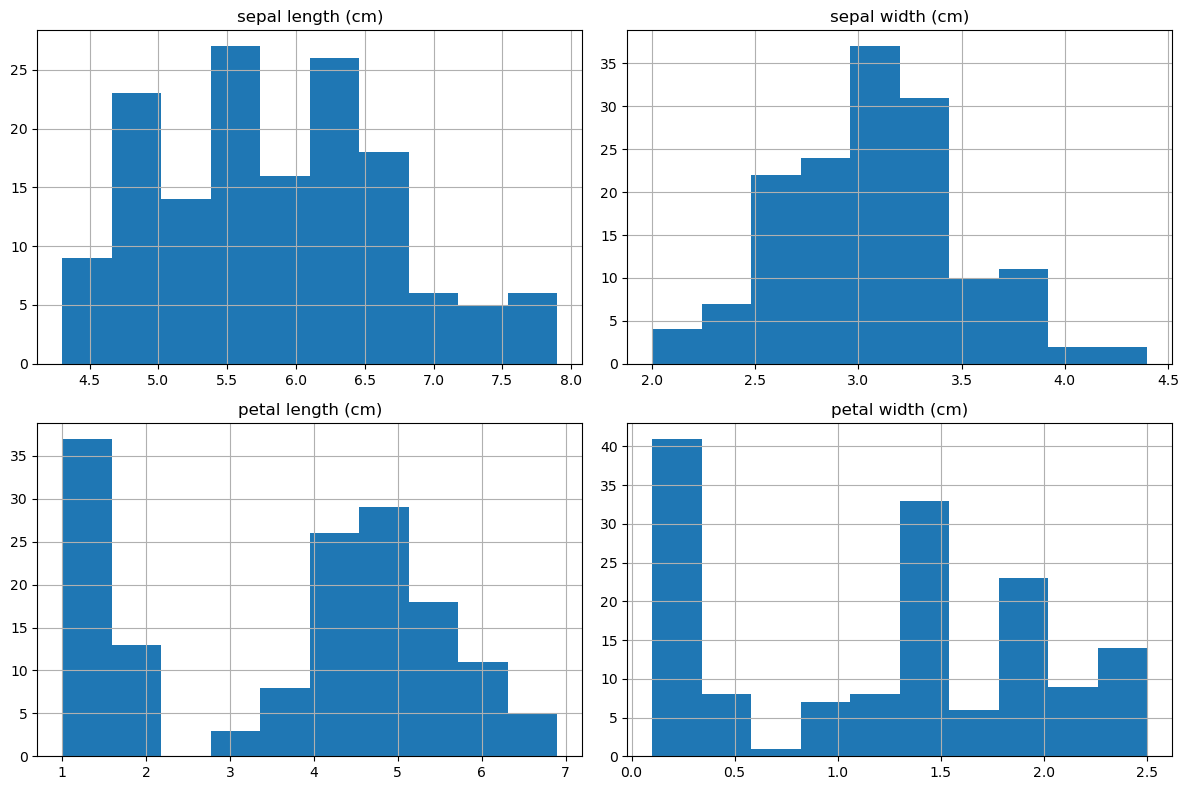

In [11]:
iris_df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

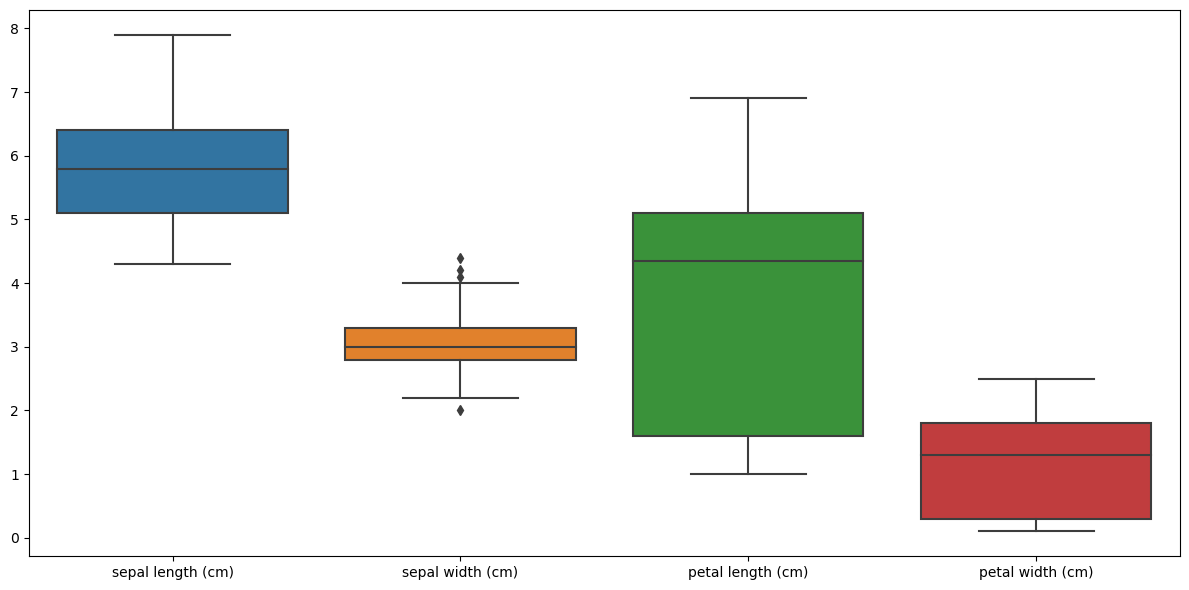

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=iris_df)
plt.tight_layout()
plt.show()

plt.savefig('boxplot_feature.png')

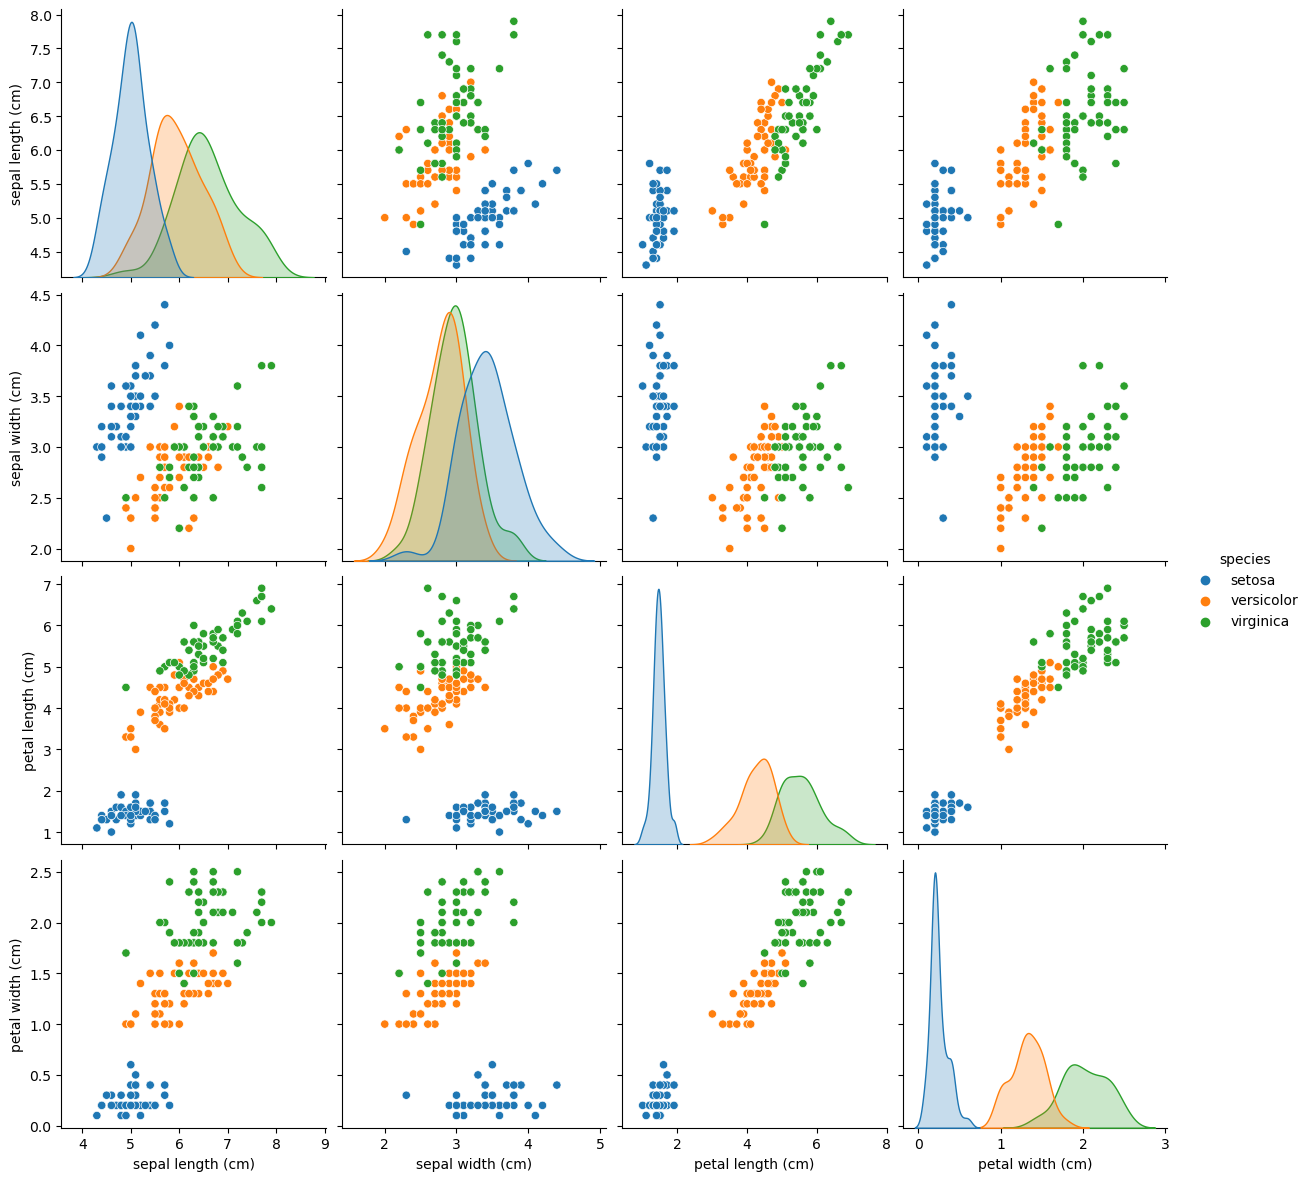

In [13]:
sns.pairplot(iris_df, hue="species",height=3)

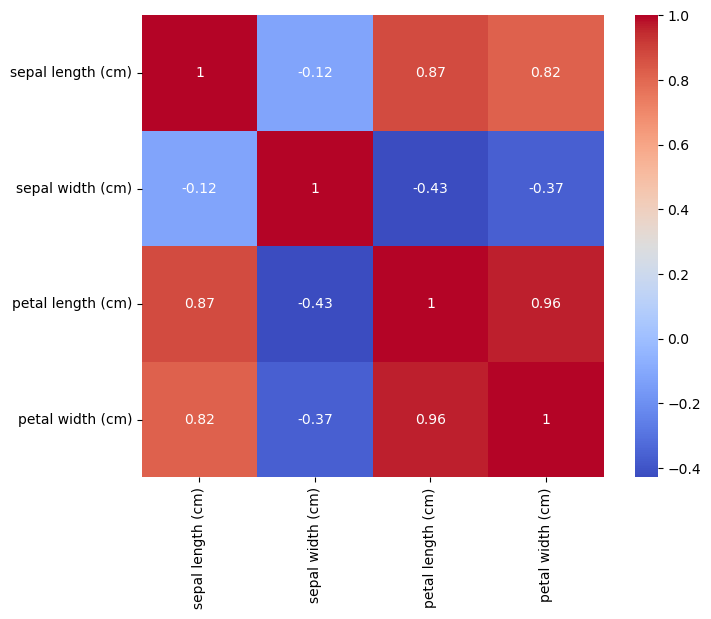

In [15]:
correlation_matrix = iris_df.drop(columns="species").corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', square=True)
plt.show()         
            

In [18]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [19]:
data = {
'真实标签':[1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
'预测分数':[0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.30, 0.1]
}
df=pd.DataFrame(data)
df.head(10)

,真实标签,预测分数
0,1,0.900
1,1,0.800
2,0,0.700
3,1,0.600
4,1,0.550
5,1,0.540
6,0,0.530
7,0,0.520
8,1,0.510
9,0,0.505


In [20]:
df_sorted = df.sort_values(by='预测分数',ascending=False)

cumulative_tp = df_sorted['真实标签'].cumsum()
cumulative_fp = (1 - df_sorted['真实标签']).cumsum()

total_tp = cumulative_tp.iloc[-1]
total_fp = cumulative_fp.iloc[-1]

fpr = cumulative_fp / total_fp
tpr = cumulative_tp / total_tp

roc_auc = auc(fpr, tpr)

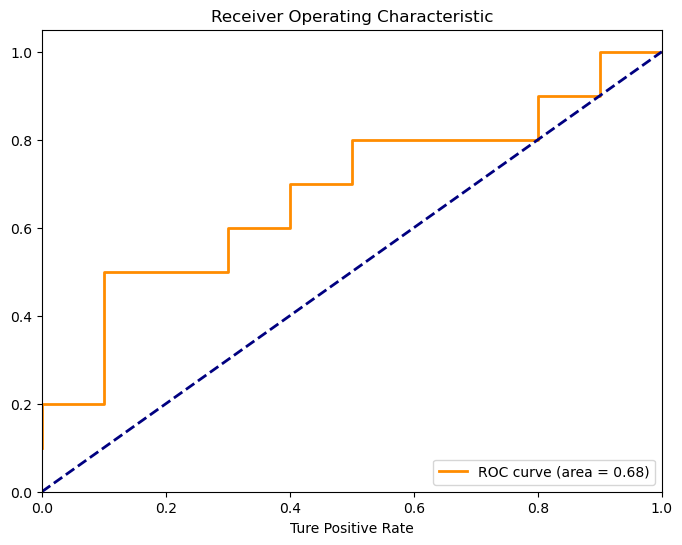

In [21]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0,1], color='navy', lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.xlabel('Ture Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()